In [21]:
import numpy as np
import pandas as pd
import jieba
from gensim.models.doc2vec  import Doc2Vec, TaggedDocument
olderr = np.seterr(all='ignore')
import os
import json

In [22]:
# pre-prepare the data
f = open("D:\\ML\\text_class\\comments.json","r",encoding="utf-8")
# create a 3D matrix for (anime, contents, words)
def ignore(words):
    tmp = []
    for word in words:
        if word not in "、，“”。？！；：...1234567890‘’-《》 （）[] 【】{}":
            tmp.append(word)
    return tmp
anime = []
sentences = []
for line in f:
    contents = []
    data = json.loads(line)
    len = min(20, data["count"])
    if len > 0:
        for i in range(len):
            context = data["comments"][i]["content"]
            result = list(jieba.cut(context,cut_all=False))
            result = ignore(result)
            contents.append(result)
            sentences.append(result)
    else:
        for i in range(20):
            result = ["差"]
            contents.append(result)
            sentences.append(result)
    anime.append(contents)

In [32]:
np.array(sentences).shape
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
model = Doc2Vec(documents, vector_size=10, window=7, min_count=1, workers=4)

In [33]:
# use comments to define the anime
anime_vector = []
for i, specific_anime in enumerate(anime):
    for sentence in specific_anime:
        sentence_vec = np.zeros(10)
        tmp = np.zeros(10)
        for word in sentence:
            tmp += model.wv[word]
        sentence_vec += tmp
    anime_vector.append(sentence_vec)

In [34]:
np.array(anime_vector).shape

(3422, 10)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True)

In [36]:
result = pca.fit_transform(np.array(anime_vector))

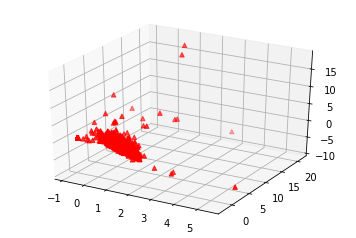

In [37]:
from matplotlib import pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D 
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(result.T[0], result.T[1], result.T[2], c = 'r', marker = '^') #点为红色三角形

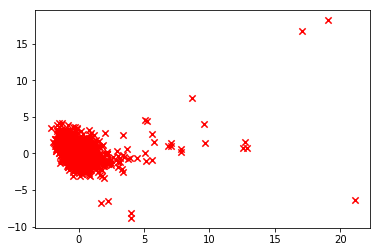

In [38]:
plt.scatter(result.T[1], result.T[2], marker = 'x',color = 'red', s = 40 ,label = 'First')